<a href="https://colab.research.google.com/github/JayanthK99/Jayanth_INFO5731_Spring2025/blob/main/Kaddipudi_Jayanth_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
pip install numpy nltk scikit-learn gensim pyLDAvis matplotlib

In [ ]:
import numpy as np
import nltk
import re
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
np.random.seed(42)
random_indices = np.random.choice(len(newsgroups.data), 2000, replace=False)
documents = [newsgroups.data[i] for i in random_indices]
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
extra_stopwords = {"can", "could", "may", "might", "must", "shall", "should",
                   "will", "would", "ought", "need", "dare", "has", "have", "had"}
stop_words.update(extra_stopwords)
def is_gibberish(word):
    return len(word) > 10 or re.search(r'(\w{2,})\1{3,}', word)
def is_meaningful(word):
    return wordnet.synsets(word)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and not is_gibberish(token) and is_meaningful(token)]
    return tokens
processed_texts = [preprocess_text(doc) for doc in documents]
print("Sample processed document:")
print(processed_texts[0])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sample processed document:
['runner', 'leave', 'base', 'time', 'ball', 'caught', 'he', 'got', 'tag', 'caught', 'tag', 'he', 'feeling', 'lucky', 'runner', 'second', 'sprint', 'glory', 'soon', 'ball', 'popped', 'caught', 'he', 'probably', 'scored', 'run', 'he', 'probably', 'headed', 'aaa', 'effect', 'infield', 'fly', 'make', 'batter', 'thereby', 'removing', 'force', 'runner', 'base', 'rule', 'apply', 'standing', 'second', 'first', 'open', 'ball', 'popped']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
texts = [" ".join(tokens) for tokens in processed_texts]
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(texts)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(doc_term_matrix)
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out())

Topic 0:
file gun state law control firearm crime right weapon people
Topic 1:
god people say game think way jesus thing time like
Topic 2:
drive card disk hard controller scsi support mb pin board
Topic 3:
year program patient cancer health russian think government rate page
Topic 4:
use internet argument car user make example section address email
Topic 5:
image file graphic server package program mail send data version
Topic 6:
file available program like know use list format post source
Topic 7:
window problem like use know time work new really good
Topic 8:
armenian turkish key chip people child image government gamma time
Topic 9:
said people know come like printer good think right year


In [ ]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=10, random_state=42)
lsa.fit(doc_term_matrix)
display_topics(lsa, vectorizer.get_feature_names_out())

Topic 0:
file gun control firearm state use mr united directory handgun
Topic 1:
drive disk data image support hard available feature rom program
Topic 2:
drive disk hard rom controller feature card support file floppy
Topic 3:
russian russia senior official president think program government fund american
Topic 4:
internet privacy anonymous user address email network identity account use
Topic 5:
cancer page hiv patient health medical aid treatment april breast
Topic 6:
argument fallacy conclusion premise example true ad god false valid
Topic 7:
section firearm weapon military license dangerous person division device applicant
Topic 8:
font server use client resource window version subject available display
Topic 9:
said armenian people door ira send ray time child went


In [ ]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

dictionary = Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]
lda_topics = [[dictionary[id] for id in lda.components_[i].argsort()[-10:]] for i in range(10)]
coherence_lda = CoherenceModel(topics=lda_topics, texts=processed_texts, dictionary=dictionary, coherence='c_v').get_coherence()
lsa_topics = [[dictionary[id] for id, _ in sorted(enumerate(lsa.components_[i]), key=lambda x: x[1], reverse=True)[:10]] for i in range(10)]
coherence_lsa = CoherenceModel(topics=lsa_topics, texts=processed_texts, dictionary=dictionary, coherence='c_v').get_coherence()
print(f"Coherence Score (LDA): {coherence_lda}")
print(f"Coherence Score (LSA): {coherence_lsa}")

Coherence Score (LDA): 0.5872495621286083
Coherence Score (LSA): 0.5856821354671266


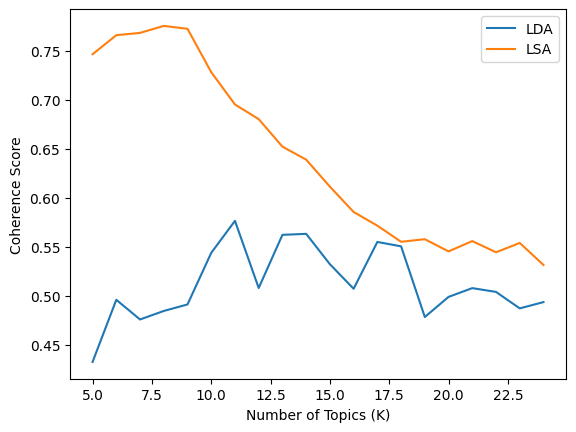

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary

processed_texts_str = [" ".join(doc) for doc in processed_texts]

vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(processed_texts_str)

dictionary = {i: word for word, i in vectorizer.vocabulary_.items()}

def calculate_coherence(doc_term_matrix, dictionary, texts, model_type, k_range):
    coherence_scores = []
    for k in k_range:
        if model_type == 'lda':
            model = LatentDirichletAllocation(n_components=k, random_state=42)
            model.fit(doc_term_matrix)
            topics = [[dictionary[id] for id in model.components_[i].argsort()[-10:]] for i in range(k)]
        elif model_type == 'lsa':
            model = TruncatedSVD(n_components=k, random_state=42)
            model.fit(doc_term_matrix)
            topics = [[dictionary[id] for id, _ in sorted(enumerate(model.components_[i]), key=lambda x: x[1], reverse=True)[:10]] for i in range(k)]
        coherence = CoherenceModel(topics=topics, texts=texts, dictionary=Dictionary(texts), coherence='c_v').get_coherence()
        coherence_scores.append(coherence)
    return coherence_scores

k_range = range(5, 25)

coherence_lda_scores = calculate_coherence(doc_term_matrix, dictionary, processed_texts, 'lda', k_range)
coherence_lsa_scores = calculate_coherence(doc_term_matrix, dictionary, processed_texts, 'lsa', k_range)

plt.plot(k_range, coherence_lda_scores, label='LDA')
plt.plot(k_range, coherence_lsa_scores, label='LSA')
plt.xlabel('Number of Topics (K)')
plt.ylabel('Coherence Score')
plt.legend()
plt.show()


In [ ]:
!pip uninstall -y scipy numpy
!pip install numpy==1.24.4 scipy==1.11.4

Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 14.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires nump

In [ ]:
import scipy
from scipy.linalg import triu
import numpy as np

print("SciPy version:", scipy.__version__)

SciPy version: 1.11.4


In [ ]:
import gensim
print("Gensim version:", gensim.__version__)

Gensim version: 4.3.3


In [ ]:
from gensim.corpora import Dictionary
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models import LdaModel

dictionary = Dictionary(processed_texts)
doc_term_matrix = [dictionary.doc2bow(text) for text in processed_texts]
lda_model = LdaModel(corpus=doc_term_matrix, num_topics=20, id2word=dictionary, passes=15)

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)


# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [ ]:
!pip install gensim
!pip install --upgrade h5py

In [ ]:
!pip uninstall -y numpy scipy
!pip install numpy==1.26.4 scipy==1.13.1

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)


In [ ]:
import pandas as pd
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
file_path = "/content/List_of_narrators_Cleaned_File.csv"
df = pd.read_csv(file_path)
stop_words = set(stopwords.words('english'))
def clean_text(x):
    x = str(x)
    x = x.lower()
    x = re.sub(r'#[A-Za-z0-9]*', ' ', x)
    x = re.sub(r'https*://.*', ' ', x)
    x = re.sub(r'@[A-Za-z0-9]+', ' ', x)
    tokens = word_tokenize(x)
    x = ' '.join([w for w in tokens if w.lower() not in stop_words])
    x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
    x = re.sub(r'\d+', ' ', x)
    x = re.sub(r'\n+', ' ', x)
    x = re.sub(r'\s{2,}', ' ', x)
    return x.strip()

df['clean_text'] = df[['Bio', 'Interview Title', 'Date and Location']].apply(lambda row: ' '.join(str(val) for val in row), axis=1).apply(clean_text)
Text = df['clean_text'].tolist()

In [ ]:
initial_topic_model = BERTopic(nr_topics=10, language="english")
topics, probs = initial_topic_model.fit_transform(Text)
print("Initial 10 Topics:", initial_topic_model.get_topic_info())

Initial 10 Topics:    Topic  Count                                      Name  \
0     -1     69          -1_japan_seattle_washington_bear   
1      0    588               0_california_camp_nisei_war   
2      1    110        1_sansei_california_camp_interview   
3      2     66    2_seattle_universe_washington_american   
4      3     52         3_hawaii_honolulu_serve_ddrdensho   
5      4     41  4_island_banbridge_bainbridge_washington   
6      5     27           5_jail_chapter_ddrsjacl_preside   
7      6     19               6_novel_california_camp_san   
8      7     18                   7_japan_kibe_age_school   
9      8     12           8_ora_administer_redress_office   

                                      Representation  \
0  [japan, seattle, washington, bear, ddrdensho, ...   
1  [california, camp, nisei, war, interview, conc...   
2  [sansei, california, camp, interview, bear, fa...   
3  [seattle, universe, washington, american, inte...   
4  [hawaii, honolulu, serve, 

In [ ]:
!pip uninstall -y scipy numpy
!pip install numpy==1.24.4 scipy==1.11.4

In [ ]:
import scipy
from scipy.linalg import triu
import numpy as np

print("SciPy version:", scipy.__version__)

SciPy version: 1.11.4


In [ ]:
!pip install numpy==1.26.4
!pip install --upgrade jax jaxlib

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 MB 6.1 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.5.1
    Uninstalling jaxlib-0.5.1:
      Successfully uninstalled jaxlib-0.5.1
  Attempting uninstall: jax
    Found existing installation: jax 0.5.2
    Uninstalling jax-0.5.2:
      Successfully uninstalled jax-0.5.2


In [ ]:
!pip install bertopic
from bertopic import BERTopic


In [ ]:
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
def calculate_coherence_score(data, min_k=2, max_k=20):
    coherence_scores = []
    for k in range(min_k, max_k + 1):
        model = BERTopic(nr_topics=k)
        topics, _ = model.fit_transform(data)
        topic_words = [[word for word, _ in model.get_topic(topic)] for topic in model.get_topics().keys() if topic != -1]
        tokenized_data = [doc.split() for doc in data]
        dictionary = Dictionary(tokenized_data)
        coherence_model = CoherenceModel(topics=topic_words, texts=tokenized_data, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append((k, coherence_score))
        print(f"K={k}, Coherence Score={coherence_score}")
    return coherence_scores

coherence_scores = calculate_coherence_score(Text)

K=2, Coherence Score=0.7403293047898339
K=3, Coherence Score=0.7328131278241614
K=4, Coherence Score=0.66481749133567
K=5, Coherence Score=0.6592681588546664
K=6, Coherence Score=0.6943767195625787
K=7, Coherence Score=0.6617617843505863
K=8, Coherence Score=0.6536442381933104
K=9, Coherence Score=0.639828942148454
K=10, Coherence Score=0.6441104028870747
K=11, Coherence Score=0.6495817014125314
K=12, Coherence Score=0.6520398072842956
K=13, Coherence Score=0.6756457300204961
K=14, Coherence Score=0.6700082799087043
K=15, Coherence Score=0.6664571809399793
K=16, Coherence Score=0.657786216370179
K=17, Coherence Score=0.6636533183017063
K=18, Coherence Score=0.6725063494302128
K=19, Coherence Score=0.6628376319513287
K=20, Coherence Score=0.6716806849260417


In [ ]:
k_values, scores = zip(*coherence_scores)
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.grid(True)
plt.show()

optimal_k = max(coherence_scores, key=lambda x: x[1])[0]
print(f"Optimal number of topics: {optimal_k}")

In [ ]:

final_topic_model = BERTopic(nr_topics=5, language="english")
final_topics, _ = final_topic_model.fit_transform(Text)
final_topic_info = final_topic_model.get_topic_info()
print("\nFinal Topics and Their Top Words:")
for topic_num in final_topic_info['Topic']:
    if topic_num != -1:
        words = final_topic_model.get_topic(topic_num)
        print(f"Topic {topic_num}: {[word for word, _ in words[:100]]}")


Final Topics and Their Top Words:
Topic 0: ['california', 'camp', 'interview', 'war', 'bear', 'concent', 'washington', 'nisei', 'ddrdensho', 'world']
Topic 1: ['seattle', 'universe', 'washington', 'american', 'ddrdensho', 'japanese', 'interview', 'work', 'school', 'state']
Topic 2: ['jail', 'chapter', 'ddrsjacl', 'preside', 'common', 'seattle', 'lead', 'interview', 'bill', 'tasha']
Topic 3: ['ora', 'administer', 'redress', 'office', 'depart', 'justice', 'work', 'eli', 'payment', 'identify']


In [ ]:

final_topic_model.visualize_barchart(top_n_topics=5, n_words=10, width=300, height=400)

In [ ]:
final_topic_model.visualize_topics()

# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
! pip install openai

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import random
import re
import nltk
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('punkt_tab')
english_vocab = set(words.words())
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
newsgroups = fetch_20newsgroups(subset='train')
random.seed(42)
preprocessed_documents = random.sample(range(len(newsgroups.data)), 2000)
sampled_documents = [newsgroups.data[i] for i in preprocessed_documents]
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    cleaned_tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and
           word in english_vocab and
           2 < len(word) < 20
    ]
    return ' '.join(cleaned_tokens)
sampled_documents = [preprocess(doc) for doc in sampled_documents]
print("Processed text:")
print(sampled_documents[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Processed text:
alan subject hockey coverage organization university canada general question extensive coverage canada almost impossible watch series two series opportunity watch year latter wrong time zone canada basically coverage wonder many nationally even locally much precedence take say local news waste please news feed kind slow anyways


In [ ]:
!pip install openai
from google.colab import userdata
import openai
openai_api_key = userdata.get('OPENAI_API_KEY')
openai.api_key = openai_api_key

In [ ]:
import gensim
import numpy as np
import scipy
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

def calculate_coherence_score(topics_words):
    dictionary = Dictionary(topics_words)
    corpus = [dictionary.doc2bow(words) for words in topics_words]
    cm = CoherenceModel(topics=topics_words,
                        dictionary=dictionary,
                        texts=[words.split() for doc in sampled_documents],
                        coherence='c_v')
    return cm.get_coherence()

In [ ]:
def calculate_coherence_score(data, min_k=2, max_k=20):
    coherence_scores = []
    for k in range(min_k, max_k + 1):
        model = BERTopic(nr_topics=k)
        topics, _ = model.fit_transform(data)
        topic_words = [[word for word, _ in model.get_topic(topic)] for topic in model.get_topics().keys() if topic != -1]  # Assuming model.get_topic returns (word, frequency) tuples
        tokenized_data = [doc.split() for doc in data]
        dictionary = Dictionary(tokenized_data)
        coherence_model = CoherenceModel(topics=topic_words, texts=tokenized_data, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append((k, coherence_score))
        print(f"K={k}, Coherence Score={coherence_score}")
    return coherence_scores

In [ ]:
from openai import OpenAI
client = OpenAI(api_key=openai_api_key)

def summarize_document(document):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful summarizer."},
            {"role": "user", "content": f"Summarize this in 1-2 sentences: {document}"}
        ],
        max_tokens=100,
        temperature=0.7
    )
    return response.choices[0].message.content

summarized_documents = [summarize_document(doc) for doc in sampled_documents]
print("First 5 summaries:")
for i, summary in enumerate(summarized_documents[:5]):
    print(f"{i+1}. {summary}")

First 5 summaries:
1. The author criticizes a Canadian university's hockey coverage, stating that it is poorly timed and lacks comprehensive national and local coverage. They feel that the coverage is a waste of time and resources and would prefer a faster news feed.
2. The author critiques a comparison between the University of Michigan Engineering organization and the distribution of engineering worldwide, suggesting that such general comparisons are not useful in determining the quality or speed of a processor. They believe that focusing solely on processor speed as the main factor in determining the efficiency of a system is impractical and that overall system design is more crucial for performance.
3. The university college station is facing a distribution problem with their machine, resulting in unrecognizable samples. They are seeking help to properly organize and run the machine to ensure accurate results.
4. The article discusses using a self-distribution organization in Resea

In [ ]:
!pip install numpy==1.24.4 scipy==1.11.4

import scipy
import scipy.linalg
import numpy as np

print("Scipy version:", scipy.__version__)
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.

Scipy version: 1.14.1
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


In [ ]:
!pip install --upgrade h5py

In [ ]:
!pip install numpy==1.26.4
!pip install --upgrade jax jaxlib
!pip install bertopic sentence-transformers umap-learn sklearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 MB 8.1 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.5.1
    Uninstalling jaxlib-0.5.1:
      Successfully uninstalled jaxlib-0.5.1
  Attempting uninstall: jax
    Found existing installation: jax 0.5.2
    Uninstalling jax-0.5.2:
      Successfully uninstalled jax-0.5.2


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install bertopic

In [ ]:
from bertopic import BERTopic
from hdbscan import HDBSCAN

min_cluster_sizes = range(10, 51, 10)
best_coherence = -1
best_min_cluster_size = -1

for size in min_cluster_sizes:
    hdbscan_model = HDBSCAN(min_cluster_size=size, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
    model = BERTopic(hdbscan_model=hdbscan_model)
    topics, _ = model.fit_transform(summarized_documents)
    topics_words = [[word for word, _ in model.get_topic(topic)] for topic in set(topics) if isinstance(topic, int)]
    coherence_score = calculate_coherence_score(summarized_documents, min_k=size, max_k=size)
    if coherence_score[0][1] > best_coherence:
        best_coherence = coherence_score[0][1]
        best_min_cluster_size = size

print(f"Optimal min_cluster_size: {best_min_cluster_size}")

K=10, Coherence Score=0.3805114532128504
K=20, Coherence Score=0.4442152753208498
K=30, Coherence Score=0.43692616236369064
K=40, Coherence Score=0.4288817302548357
K=50, Coherence Score=0.4490008099452194
Optimal min_cluster_size: 50


In [ ]:
from bertopic import BERTopic
from hdbscan import HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=best_min_cluster_size, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

optimal_model = BERTopic(hdbscan_model=hdbscan_model)
topics, _ = optimal_model.fit_transform(summarized_documents)

In [ ]:
from collections import defaultdict

def group_by_topic(summarized_documents, topic_assignments):
    topic_documents = defaultdict(list)
    for doc, topic in zip(summarized_documents, topic_assignments):
        if isinstance(topic, int):
            topic_documents[topic].append(doc)
    return topic_documents

In [ ]:
def summarize_chunks(client, documents, chunk_size=5):
    summaries = []
    for i in range(0, len(documents), chunk_size):
        chunk = documents[i:i + chunk_size]
        prompt = f"Summarize these in 40-50 words:\n" + "\n".join(f"- {doc}" for doc in chunk)

        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a concise summarizer."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=200,
            temperature=0.5
        )
        summaries.append(response.choices[0].message.content.strip())

    return " ".join(summaries)

In [ ]:
def generate_all_summaries(topic_documents, openai_api_key):
    client = OpenAI(api_key=openai_api_key)
    return {
        topic_id: summarize_chunks(client, docs)
        for topic_id, docs in topic_documents.items()
        if docs
    }

In [ ]:

topic_groups = group_by_topic(summarized_documents, optimal_model.topics_)
topic_summaries = generate_all_summaries(topic_groups, openai_api_key)

In [ ]:
for topic_id, summary in topic_summaries.items():
    print(f"TOPIC {topic_id}:")
    print("-"*50)
    print(summary)
    print(f"\nDocuments in this topic: {len(topic_groups[topic_id])}")
    print("="*50 + "\n")

TOPIC 1:
--------------------------------------------------
The author criticizes a Canadian university's hockey coverage for being poorly timed and lacking comprehensive national and local coverage. The Polytechnical Institute of Raj is concerned about Maple Leaf updates, particularly regarding Peter and Mark's injuries. Returning to sports after a break poses challenges, with tough competition and the need for a strong division. A college baseball organization believes a rusty ballplayer named Brown is a pitcher. A report details final regular season attendance for NHL teams, listing average attendance numbers for various teams. A radio station's data shows Howard Stern's show gaining ratings with new controversial and humorous content. Concerns about show's direction and aging due to shock value. Brett Smith's declining performance as a shortstop raises concerns about his defensive and offensive skills. Roger's inconsiderate behavior in a hockey group prompts a call for change. Prai

# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [ ]:
!pip install bertopic sentence-transformers umap-learn sklearn matplotlib pandas numpy

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
! pip install BerTopic

  Using cached bertopic-0.17.0-py3-none-any.whl.metadata (23 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found ex

In [ ]:
import numpy as np
import re
import nltk
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from umap import UMAP

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
docs = np.random.choice(newsgroups.data, 2000, replace=False)
additional_stopwords = {
    "can", "could", "may", "might", "must", "shall", "should",
    "will", "would", "ought", "need", "dare", "has", "have", "had",
    "and", "of", "to", "for", "is", "that", "the", "a", "an", "in",
    "on", "at", "by", "with", "from", "as", "about", "into", "over",
    "under", "between", "among", "up", "down", "out", "off", "again",
    "further", "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "any", "both", "each", "few", "more", "most", "other",
    "some", "such", "no", "nor", "not", "only", "own", "same", "so",
    "than", "too", "very", "does", "do", "doing", "being", "been", "am",
    "are", "was", "were", "be", "having", "shall", "shouldn’t",
    "wouldn’t", "couldn’t", "didn’t", "won’t", "isn’t", "aren’t",
    "wasn’t", "weren’t", "i", "me", "my", "mine", "you", "your", "yours",
    "he", "him", "his", "she", "her", "hers", "it", "its", "we", "us",
    "our", "ours", "they", "them", "their", "theirs","like","the"
    }

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english')) | additional_stopwords
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

cleaned_docs = [clean_text(doc) for doc in docs]
cleaned_docs = [doc for doc in cleaned_docs if len(doc.split()) > 5]
print("\nSample cleaned document:")
print(cleaned_docs[0][:200])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Sample cleaned document:
able pick adb cable computer wiring store give address alberta computer cable calgary victoria canada dont think address calgary help muchbasically however phoned charged approx cnd custom made adb ex


In [ ]:
from bertopic import BERTopic

default_model = BERTopic(
    language="english",
    min_topic_size=15,
    verbose=True
)
default_topics, default_probs = default_model.fit_transform(cleaned_docs)
print("\nDefault Model Topics:")
print(default_model.get_topic_info().head())

2025-04-06 06:20:32,119 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/59 [00:00<?, ?it/s]

2025-04-06 06:22:29,454 - BERTopic - Embedding - Completed ✓
2025-04-06 06:22:29,457 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 06:22:50,072 - BERTopic - Dimensionality - Completed ✓
2025-04-06 06:22:50,073 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 06:22:50,172 - BERTopic - Cluster - Completed ✓
2025-04-06 06:22:50,191 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 06:22:50,472 - BERTopic - Representation - Completed ✓



Default Model Topics:
   Topic  Count                     Name  \
0      0   1706   0_one_people_file_know   
1      1    180  1_game_team_play_player   

                                      Representation  \
0  [one, people, file, know, get, dont, also, tim...   
1  [game, team, play, player, year, season, perio...   

                                 Representative_Docs  
0  [account antiarmenian human right violatins az...  
1  [peter ahola season acquired trade pittsburgh ...  


In [ ]:
custom_model = BERTopic(
    embedding_model=SentenceTransformer("all-MiniLM-L6-v2"),
    umap_model=UMAP(n_components=5, metric='cosine'),
    hdbscan_model=DBSCAN(min_samples=10),
    verbose=True
)
custom_topics, _ = custom_model.fit_transform(cleaned_docs)

2025-04-06 06:23:01,011 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/59 [00:00<?, ?it/s]

2025-04-06 06:24:41,439 - BERTopic - Embedding - Completed ✓
2025-04-06 06:24:41,441 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 06:24:48,799 - BERTopic - Dimensionality - Completed ✓
2025-04-06 06:24:48,800 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 06:24:48,825 - BERTopic - Cluster - Completed ✓
2025-04-06 06:24:48,829 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 06:24:49,108 - BERTopic - Representation - Completed ✓


In [ ]:
def calculate_coherence(model, docs, top_n=5):
    coherence_scores = []
    for topic in model.get_topics():
        words = [word for word,_ in model.get_topic(topic)][:top_n]
        score = sum(1 for doc in docs if all(word in doc for word in words[:2]))
        coherence_scores.append(score)
    return np.mean(coherence_scores)

print(f"Default Coherence: {calculate_coherence(default_model, docs):.1f}")
print(f"Custom Coherence: {calculate_coherence(custom_model, docs):.1f}")

print("\nTopic Examples:")
print("Default Topic 0:", default_model.get_topic(0)[:5])
print("Custom Topic 0:", custom_model.get_topic(0)[:5])

Default Coherence: 132.5
Custom Coherence: 46.7

Topic Examples:
Default Topic 0: [('one', np.float64(0.027077519203407487)), ('people', np.float64(0.021167638837093102)), ('file', np.float64(0.021012824674376443)), ('know', np.float64(0.018967952358103758)), ('get', np.float64(0.018813267015347596))]
Custom Topic 0: [('file', np.float64(0.022300153604262643)), ('maxaxaxaxaxaxaxaxaxaxaxaxaxaxax', np.float64(0.021795993249062565)), ('window', np.float64(0.020119172396221723)), ('image', np.float64(0.019899134821242698)), ('get', np.float64(0.019682484279167814))]


In [ ]:
default_model.visualize_barchart(top_n_topics=10).show()
custom_model.visualize_barchart(top_n_topics=10).show()

In [ ]:
default_model.visualize_documents(docs).show()
custom_model.visualize_documents(docs).show()

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
# Write your code here

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
This exercise enhanced my understanding of text preprocessing, feature extraction, and topic modeling using algorithms like LDA and BERTopic.
Implementing these models clarified how topics are derived from unstructured text. However, frequent package installations and version erros in Google Colab were  big problem for me
and the need to purchase OpenAI tokens due to API limits were frustrating. Despite the challenges, it was a valuable hands-on experience that
improved my skills in handling real-world NLP tasks, managing large text data, and understanding the practical constraints of API-based
solutions.

'''